## COMSC-240 Sample Notebook

Your mission: download this notebook. Rename it such that your last name appears at the end of the filename. Enter any simple Python code in the cell below and run it. 

Save your notebook, then Close+Halt. Submit this note book with the assignment.

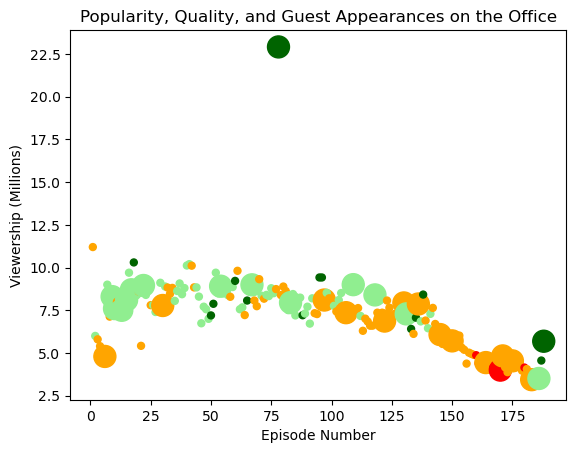

In [1]:
# Purpose: Create a visualization using matplotlib's scatter plot that displays episode number, the viewership,
# the fan rating, and guest apprearance in "The Office".
# Tools: User-defined functions with Pandas; scantter plot with matplotlib.
# Results: I was able to put 4D data (episode number, viewership, ratings, and guest appreanrace) on a 2D graph.
# Guest appreances don't necessarily affect the viewership or ratings.
# Comment: this project was done 2021 while taking an online data science program.

import pandas as pd
import matplotlib.pyplot as plt

office = pd.read_csv("the_office_series.csv", index_col=[0])

office["Episode_Number"] = office.index + 1

office["Scaled_Ratings"] = office["Ratings"] - office["Ratings"].min()
office["Scaled_Ratings"] /= office["Scaled_Ratings"].max()

def coloring(rating):
    if rating < 0.25:
        color = "red"
    elif rating < 0.5:
        color = "orange"
    elif rating < 0.75:
        color = "lightgreen"
    else:
        color = "darkgreen"
    return color

def sizing(bool):
    if pd.isna(bool) == False:
        size = 250
    else:
        size = 25
    return size

office["Color"] = office["Scaled_Ratings"].apply(coloring)
office["Size"] = office["GuestStars"].apply(sizing)

plt.scatter(x=office["Episode_Number"], 
            y=office["Viewership"], 
            c=office["Color"],
            s=office["Size"])
plt.title("Popularity, Quality, and Guest Appearances on the Office")
plt.xlabel("Episode Number")
plt.ylabel("Viewership (Millions)")
plt.show()